In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from matplotlib import pyplot as plt
from mlp_helper import draw_neural_net, return_weights_notation
import numpy as np
from keras.optimizers import Adam, SGD

# Dataset

In [231]:
N = 200
np.random.seed(10)
# X = np.random.normal(0, 10, 100)
X = np.linspace(-20, 20, N)

In [232]:
sigma = 1
y_0 = np.abs(X) + np.random.normal(0, sigma, len(X))

In [233]:
y_1 = X>0

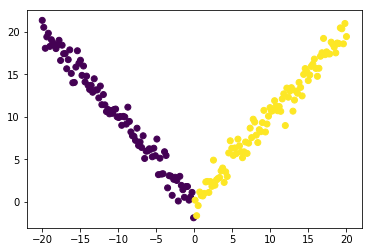

In [234]:
y = np.array([y_0, y_1]).T
plt.scatter(X, y[:,0], c=y[:,1])
plt.show()

# Model

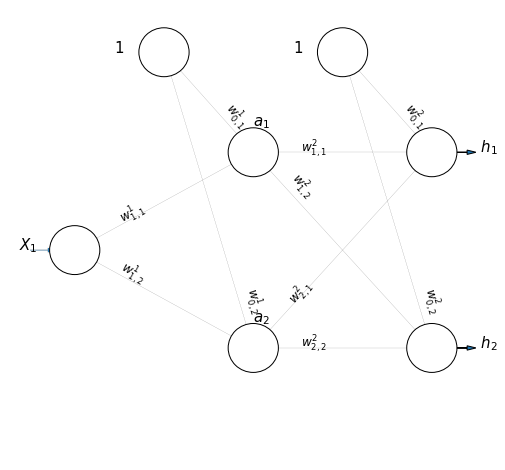

In [235]:
activation = 'relu'
input_dim = 1
hidden_units = 2

outputs = 2

fig, ax = plt.subplots(1,1,figsize=(8, 8))
shape = [input_dim,hidden_units,outputs]
weights, biases = return_weights_notation(shape)
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, shape, weights, biases)

In [236]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input

In [244]:
def get_model(activation='sigmoid'):
    X_in = Input(shape=(1,), name='Input')
    X = Dense(2, input_shape=(1,), activation=activation, name='hidden')(X_in)
    X1 = Dense(1, name='Linear_out', activation='linear')(X)
    X2 = Dense(1, name='Categorical_out', activation='sigmoid')(X)
    model = Model(X_in, [X1, X2])
    return model

model = get_model(activation=activation)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
hidden (Dense)                  (None, 2)            4           Input[0][0]                      
__________________________________________________________________________________________________
Linear_out (Dense)              (None, 1)            3           hidden[0][0]                     
__________________________________________________________________________________________________
Categorical_out (Dense)         (None, 1)            3           hidden[0][0]                     
Total params: 10
Trainable params: 10
Non-trainable params: 0
_______________________________________________

In [245]:
epochs = 100

losses = {'Linear_out': 'mse', 'Categorical_out': 'binary_crossentropy'}
metrics = {'Linear_out': 'mse', 'Categorical_out': 'accuracy'}
loss_weights = {'Linear_out': 1, 'Categorical_out': 100}

model.compile(Adam(lr=0.1), loss=losses, metrics=metrics, loss_weights=loss_weights)
# model.fit(X, [y[:,0], y[:,1]], verbose=0, epochs=epochs, batch_size=32)

model.fit(X, [y[:,0], y[:,1]], verbose=0, epochs=epochs, batch_size=16)

In [246]:
model.history.history.keys()

dict_keys(['loss', 'Linear_out_loss', 'Categorical_out_loss', 'Linear_out_mean_squared_error', 'Categorical_out_acc'])

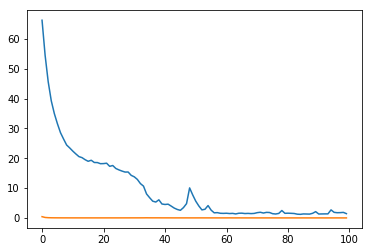

In [247]:
plt.plot(model.history.history['Linear_out_loss'])
plt.plot(model.history.history['Categorical_out_loss'])
# plt.plot(model.history.history['loss'])

In [248]:
print(model.evaluate(X, [y[:,0], y[:,1]]))
print(model.metrics_names)

200/200 [==============================] - 1s 7ms/step
[2.4522805261611937, 2.0777350521087645, 0.003745454430697919, 2.0777350521087645, 1.0]
['loss', 'Linear_out_loss', 'Categorical_out_loss', 'Linear_out_mean_squared_error', 'Categorical_out_acc']


In [249]:
y_pred = model.predict(X)

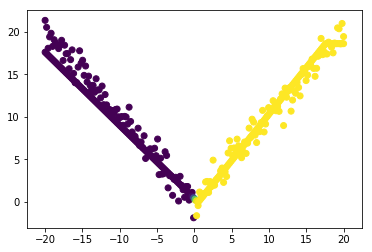

In [250]:
plt.scatter(X, y[:, 0], c=y[:,1])
plt.scatter(X, y_pred[0], c=y_pred[1])